## 'Hot' topics about climate change from World Resources Institute (WRI) (09.01.2020)

'''The global research organization that spans more than 60 countries,

with international offices in Brazil, China, India, Indonesia, Mexico and the United States,

regional offices in Ethiopia (for Africa) and the Netherlands (for Europe), 

and program offices in the Democratic Republic of Congo, Turkey and the United Kingdom'''

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import wordcloud
import requests
import re
from bs4 import BeautifulSoup
from os import path
from PIL import Image

### Web scraping with help of Python in order to make a wordcloud

In [ ]:
url = 'https://www.wri.org/our-work/topics/climate'
reqs = requests.get(url)

In [ ]:
soup = BeautifulSoup(reqs.text, 'html')

In [ ]:
soup

In [ ]:
for heading in soup.find_all(["h1", "h2", "h3"]):
    print("{1}: {1}".format(heading.name, heading.text.strip()))

In [9]:
f = open("../data/word_cloud.txt", "r")
text=f.read()

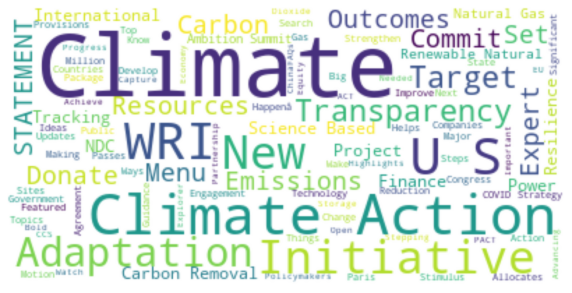

In [22]:
cloud = wordcloud.WordCloud(background_color="white",
                max_words=100,
                collocations=True).generate(text)

fig, ax= plt.subplots(figsize = (10,8))
plt.axis('off')

plt.imshow(cloud, interpolation='gaussian')
#plt.savefig('cloud.png')
plt.show()

In [18]:
umbr_mask = np.array(Image.open("../data/umbr2.png"))
umbr_mask

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

### If the value of mask is not 255 array, use this function
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

### Transformation of  mask into a new one that will work with the function:

transf_leaf_mask = np.ndarray((leaf_mask.shape[0],leaf_mask.shape[1]), np.int32)

### New mask with correct form

for i in range(len(leaf_mask)):
    transf_leaf_mask[i] = list(map(transform_format, leaf_mask[i]))

### Cloud with a mask - using the umbrella png file

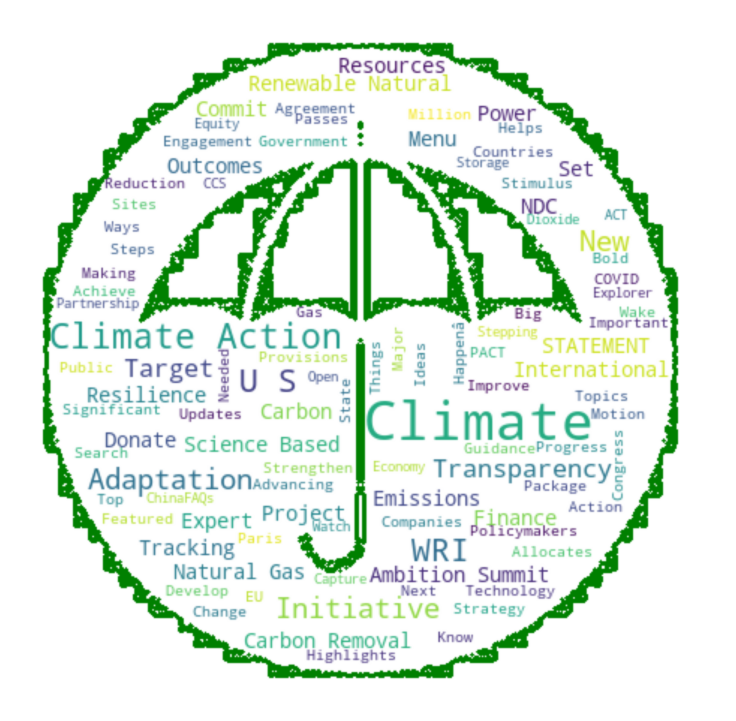

In [21]:
cloud2 = wordcloud.WordCloud(background_color="white",
                max_words=100,
                mask=umbr_mask,
                contour_width=2, contour_color='green',
                collocations=True).generate(text)

fig, ax= plt.subplots(figsize = (15,13))
plt.axis('off')

plt.imshow(cloud2, interpolation='gaussian')
plt.savefig('cloud.png')
plt.show()